In [152]:
if "logger" in globals() and  len(logger.handlers) >= 1:
    # To suppress debug output from the logger defined in .ipython/profile_default/ipython_config.py
    logger.handlers.pop()

%load_ext autoreload
%autoreload 2

%matplotlib inline
logging.getLogger("keyring").setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

import platform
BASEDIR = "/u/timoh/phd" if "freya" in platform.node() else ""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
display(HTML("<style>.output_html { display: block; margin-left: auto; margin-right: auto; }</style>"))

In [154]:
import sys
import numpy
import scipy
from matplotlib import pyplot

if "/tidalshocks/src" not in sys.path:
    sys.path.insert(0, "{}/tidalshocks/src".format(BASEDIR))
from gc_simulation import StarClusterSimulation

if "/supaharris" not in sys.path: 
    sys.path.insert(0, "{}/supaharris".format(BASEDIR))
from utils import parsec2arcmin

                 key         mass           vx           vy           vz            x            y            z
                   -         mass  length / time  length / time  length / time       length       length       length
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========
   19553115045670540    7.479e-04   -1.572e-02    1.729e-02   -1.409e-01    2.352e-02    3.176e-02   -3.687e-03
   26445406148832321    7.479e-04    6.943e-02    3.290e-02    5.973e-03   -5.837e-02   -1.433e-01    8.760e-02
   30375585161303264    7.479e-04    9.714e-02    1.551e-02    5.850e-02    7.588e-03    7.126e-03   -3.635e-03
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========
                 key         mass           vx           vy           vz            x            y            z
                   -           kg    m * s**-1    m * s**-1    m * s**-1            m            m

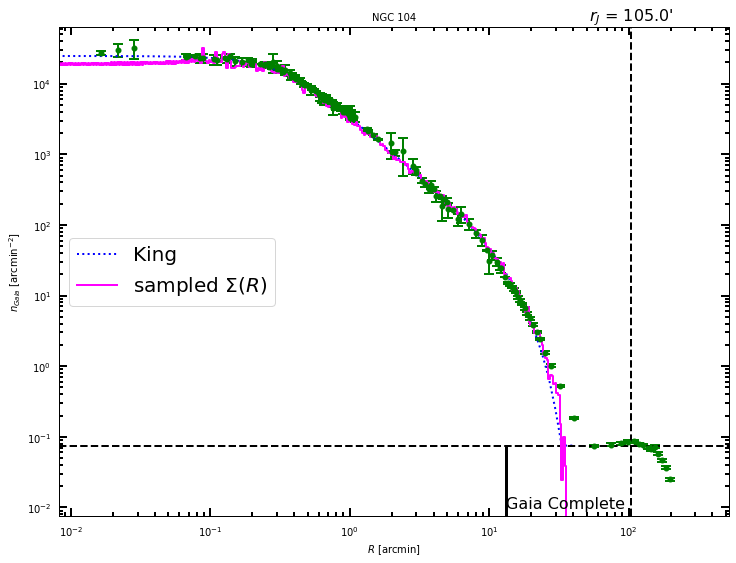

In [155]:
from amuse.units import units
from amuse.io import read_set_from_file
sim = StarClusterSimulation(logger, "NGC 104")
sim.sample_deBoer2019_bestfit_king()

fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))
sim.add_deBoer2019_to_fig(fig, show_King=True)
print(sim.king_amuse.total_mass().as_quantity_in(units.MSun))
sim.add_deBoer2019_sampled_to_ax(ax, parm="Sigma", Nbins=512)
ax.legend(fontsize=20)
pyplot.show(fig)

                 key         mass           vx           vy           vz            x            y            z
                   -           kg    m * s**-1    m * s**-1    m * s**-1            m            m            m
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========
16291414494054082600    2.144e+32    1.235e+02   -4.197e+01    2.276e+02    9.718e+16   -1.546e+17   -1.220e+17
 7891716988595704238    2.144e+32    1.633e+02   -3.340e+01   -5.377e+01   -6.543e+17   -1.579e+17    3.281e+17
16591524371825667439    2.144e+32   -5.006e+02   -2.671e+02    5.081e+02   -3.647e+16    3.263e+16    8.166e+16
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========
107803.319
107803.319


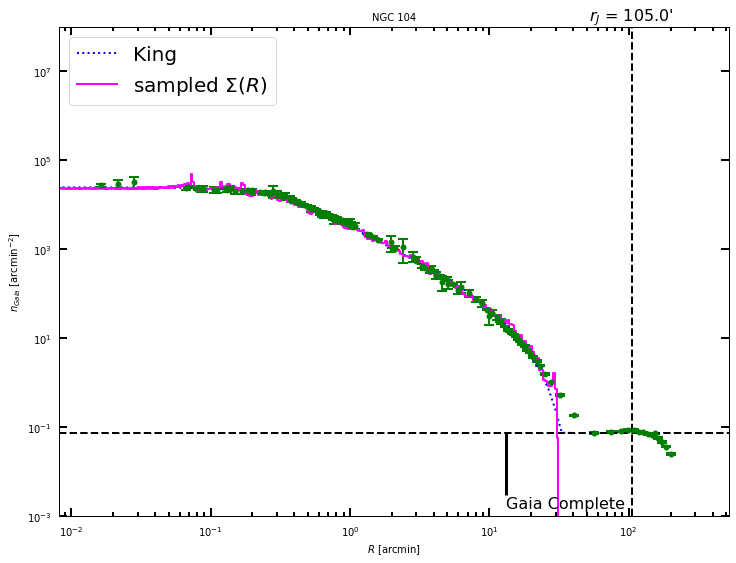

In [156]:
from amuse.units import nbody_system
from amuse.ic.limepy import new_limepy_model
W0_deB19 = sim.deB19_fit["W_king"]
M_deB19 = sim.deB19_fit["M_king"]
rt_deB19 = parsec2arcmin(sim.deB19_fit["rt_king"], sim.distance_kpc)
converter = nbody_system.nbody_to_si(M_deB19 | units.MSun, rt_deB19 | units.parsec)
p = new_limepy_model(W0_deB19, 1, N=1000, converter=converter, verbose=False)
print(p[0:3])
print(p.total_mass().value_in(units.MSun))
print(M_deB19)

fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))
sim.add_deBoer2019_to_fig(fig, show_King=True)

sim.king_amuse = p

# sim.sample_deBoer2019_bestfit_king()
sim.add_deBoer2019_sampled_to_ax(ax, parm="Sigma", Nbins=512)
# sim.add_deBoer2019_sampled_to_ax(ax, parm="rho", Nbins=512)
ax.legend(fontsize=20)
ax.set_ylim(1e-3, 1e8)
ax.set_xscale("log")
ax.set_yscale("log")
pyplot.show(fig)

Found 2 snapshots
107803.319


TypeError: add_deBoer2019_sampled_to_ax() missing 2 required positional arguments: 'model' and 'sampled'

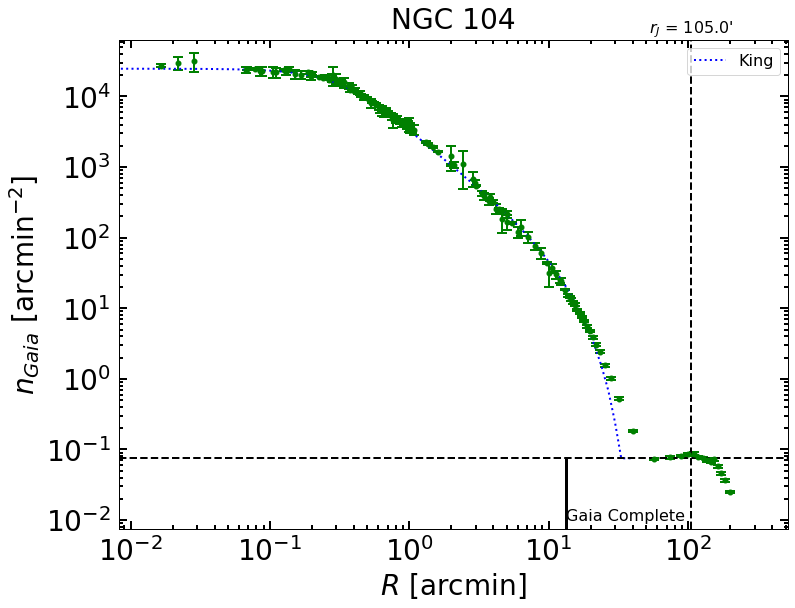

In [158]:
sim.analyse_isolation()